In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [2]:
import sys
!{sys.executable} -m pip install matplotlib


'C:\Users\Sanju' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import sys
!"{sys.executable}" -m pip install matplotlib



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Sanju Rai\tf_env\Scripts\python.exe -m pip install --upgrade pip


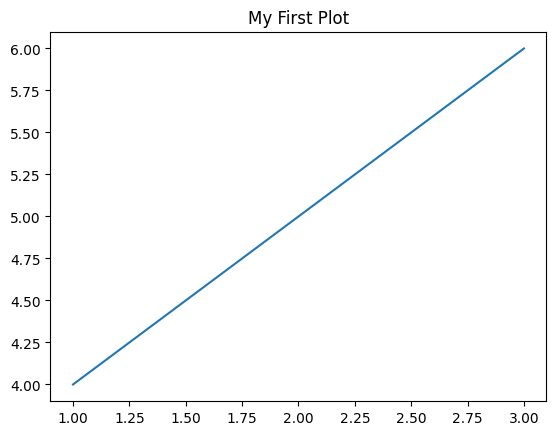

In [4]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [4, 5, 6])
plt.title("My First Plot")
plt.show()


In [5]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)


In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt




In [7]:
 #re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'

In [8]:
# Import the Vgg16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
#Every input image will be 224 pixels height, 224 pixels width, and have 3 color channels (RGB) red, green,blue"
#ImageNet is a large visual database designed for use in image recognition research. It contains:
#Over 14 million images
# Why is ImageNet so important?
#Models like VGG, ResNet, MobileNet, and Inception are first trained on ImageNet.
#This helps them "learn" general features like:
#Edges
#Shapes
#Patterns
#Image size is set to 224x224, which is standard for VGG19.


mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [9]:
mobilnet.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.applications import MobileNet

mobilnet = MobileNet(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Now freeze all the layers (no training)
for layer in mobilnet.layers:
    layer.trainable = False


In [11]:
import os



In [12]:
print(os.listdir())


['.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '1st project.ipynb', '3D Objects', 'AccVal_acc.png', 'AppData', 'Application Data', 'AppMods', 'chap5.ipynb', 'Chap6.ipynb', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'harry 1.ipynb', 'Harry strings(practice 3).ipynb', 'Links', 'List practice set 4.ipynb', 'Local Settings', 'LossVal_loss.png', 'Malaria_Detection_CNN_Project_Sanju.ipynb', 'Malaria_Prediction.ipynb', 'model_vgg19.h5', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{9ab8fe25-f0b8-11ee-af7a-b81ea42d6202}.TM.blf', 'NTUSER.DAT{9ab8fe25-f0b8-11ee-af7a-b81ea42d6202}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{9ab8fe25-f0b8-11ee-af7a-b81ea42d6202}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'numPy1.ipynb', 'OneDrive', 'PrintHood', 'pyChap7.ipynb', 'Recent', 'Recorded Calls', 'Sanju- Rai-Lab-05.ipynb', 'Sanju-Rai-Lab-04.ipynb', 'Sanju-Rai-Lab-06.i

In [13]:
from glob import glob

In [14]:
train_path = r'C:\Users\Sanju Rai\Downloads\Dataset (4)\Dataset\Train'
test_path = r'C:\Users\Sanju Rai\Downloads\Dataset (4)\Dataset\Test'

from glob import glob
folders = glob(train_path + '/*')  # Now this will point inside Train folder
print("Classes found:", folders)


Classes found: ['C:\\Users\\Sanju Rai\\Downloads\\Dataset (4)\\Dataset\\Train\\Parasite', 'C:\\Users\\Sanju Rai\\Downloads\\Dataset (4)\\Dataset\\Train\\Uninfected']


In [15]:
folders

['C:\\Users\\Sanju Rai\\Downloads\\Dataset (4)\\Dataset\\Train\\Parasite',
 'C:\\Users\\Sanju Rai\\Downloads\\Dataset (4)\\Dataset\\Train\\Uninfected']

In [16]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Step 1: Load MobileNet base
mobilnet = MobileNet(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Step 2: Freeze MobileNet layers
for layer in mobilnet.layers:
    layer.trainable = False

# Step 3: Add custom layers
x = Flatten()(mobilnet.output)
x = Dense(128, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)  # Binary classification (Parasitized or Uninfected)

# Step 4: Create the final model
model = Model(inputs=mobilnet.input, outputs=prediction)

# Optional: Show model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 9,651,778 (36.82 MB)

 Trainable params: 6,422,914 (24.50 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [17]:
from tensorflow.keras.layers import MaxPooling2D

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### Create Model from scratch using CNN
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary()


C:\Users\Sanju Rai\tf_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │      25,088,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,100,046 (95.75 MB)

 Trainable params: 25,100,046 (95.75 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Step 1: Create the model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding="same", activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation="relu"))
model.add(Dense(2, activation="softmax"))  # because you have 2 classes

# Step 2: Compile the model
model.compile(
    loss='categorical_crossentropy',   # use binary_crossentropy if your labels are just 0/1
    optimizer='adam',
    metrics=['accuracy']
)

# Step 3: Check the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 16)        │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 32)        │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │      25,088,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,100,046 (95.75 MB)

 Trainable params: 25,100,046 (95.75 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
print("Data generators created successfully!")


Data generators created successfully!


In [21]:
training_set = train_datagen.flow_from_directory(
    r'C:\Users\Sanju Rai\Downloads\Dataset (4)\Dataset\Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    r'C:\Users\Sanju Rai\Downloads\Dataset (4)\Dataset\Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
print(training_set.class_indices)



Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.
{'Parasite': 0, 'Uninfected': 1}


In [22]:
training_set

In [23]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Sanju Rai\tf_env\Scripts\python.exe -m pip install --upgrade pip


In [24]:
tf.config.run_functions_eagerly(True)


In [25]:
# Correct way to fit the model
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


C:\Users\Sanju Rai\tf_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


C:\Users\Sanju Rai\tf_env\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681ms/step - accuracy: 0.4965 - loss: 1.2940

C:\Users\Sanju Rai\tf_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 764ms/step - accuracy: 0.4969 - loss: 1.2752 - val_accuracy: 0.4104 - val_loss: 0.7209
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 873ms/step - accuracy: 0.5340 - loss: 0.6718 - val_accuracy: 0.6343 - val_loss: 0.6681
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 870ms/step - accuracy: 0.5676 - loss: 0.6077 - val_accuracy: 0.3955 - val_loss: 0.7951
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 865ms/step - accuracy: 0.7336 - loss: 0.4896 - val_accuracy: 0.3955 - val_loss: 0.9895
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 830ms/step - accuracy: 0.7628 - loss: 0.4491 - val_accuracy: 0.5672 - val_loss: 0.7219
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 832ms/step - accuracy: 0.8209 - loss: 0.4019 - val_accuracy: 0.4925 - val_loss: 0.8593
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 869ms/step - accuracy: 0.8349 - loss: 0.3805 - val_accuracy: 0.5149 - val_loss: 0.8771
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 833ms/step - accuracy: 0.8365 - loss: 0.3589 - val_accuracy: 0.671

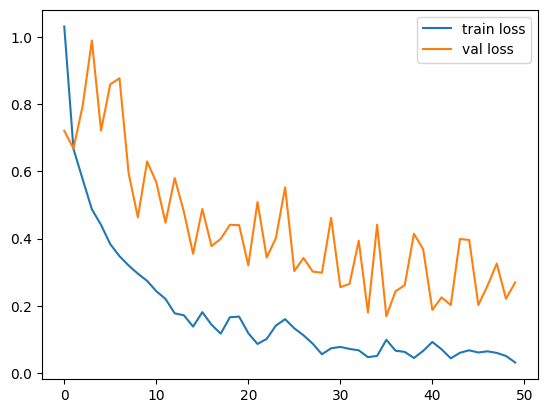

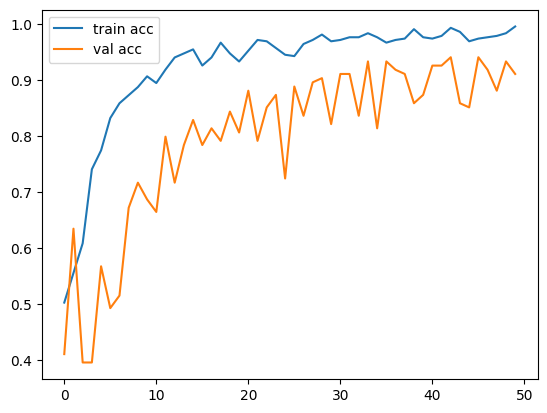

<Figure size 640x480 with 0 Axes>

In [26]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [41]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [42]:
y_pred = model.predict(test_set)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [43]:
y_pred

array([[9.94300961e-01, 5.69907855e-03],
       [1.22023956e-03, 9.98779714e-01],
       [9.99978900e-01, 2.10969865e-05],
       [2.12307204e-04, 9.99787748e-01],
       [4.28811833e-03, 9.95711923e-01],
       [1.00000000e+00, 2.53480898e-08],
       [9.99999642e-01, 3.05883844e-07],
       [9.99376953e-01, 6.23037631e-04],
       [4.26837825e-04, 9.99573171e-01],
       [1.02142505e-02, 9.89785671e-01],
       [3.18624754e-03, 9.96813715e-01],
       [1.00000000e+00, 1.29832519e-13],
       [9.82989609e-01, 1.70103982e-02],
       [9.99997139e-01, 2.86208342e-06],
       [1.00000000e+00, 2.95197089e-09],
       [5.33942191e-04, 9.99466121e-01],
       [9.99994159e-01, 5.79423477e-06],
       [6.61064347e-04, 9.99338925e-01],
       [9.99996781e-01, 3.27413477e-06],
       [7.28997588e-02, 9.27100241e-01],
       [9.97573435e-01, 2.42652255e-03],
       [9.99998569e-01, 1.45395029e-06],
       [9.99999166e-01, 8.34069510e-07],
       [1.00000000e+00, 7.80108247e-26],
       [9.999854

In [44]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [45]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0])

In [46]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [47]:
model=load_model('model_vgg19.h5')

In [142]:


img = image.load_img("C:/Users/Sanju Rai/Downloads/Dataset (4)/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_162922_cell_145.png", target_size=(224, 224))


In [153]:
img = image.load_img("C:/Users/Sanju Rai/Downloads/Dataset (4)/Dataset/Train/Parasite/C133P94ThinF_IMG_20151004_155721_cell_113.png", target_size=(224, 224))


In [154]:
import os

folder_path = "C:/Users/Sanju Rai/Downloads/Dataset (4)/Dataset/Test/Uninfected"
files = os.listdir(folder_path)

print("Files found in Uninfected folder:")
print(files[:10])  # show only first 10 files


Files found in Uninfected folder:
['2.png', 'C3thin_original_IMG_20150608_162922_cell_145.png', 'C3thin_original_IMG_20150608_162922_cell_191.png', 'C3thin_original_IMG_20150608_162922_cell_205.png', 'C3thin_original_IMG_20150608_162922_cell_211.png', 'C3thin_original_IMG_20150608_162922_cell_217.png', 'C3thin_original_IMG_20150608_163002_cell_13.png', 'C3thin_original_IMG_20150608_163002_cell_144.png', 'C3thin_original_IMG_20150608_163002_cell_146.png', 'C3thin_original_IMG_20150608_163002_cell_159.png']


In [155]:
import os

folder_path = "C:/Users/Sanju Rai/Downloads/Dataset (4)/Dataset/Train/Parasite"
files = os.listdir(folder_path)

# Print all image files
for file in files:
    print(file)


C133P94ThinF_IMG_20151004_155721_cell_111.png
C133P94ThinF_IMG_20151004_155721_cell_112.png
C133P94ThinF_IMG_20151004_155721_cell_113.png
C133P94ThinF_IMG_20151004_155721_cell_114.png
C133P94ThinF_IMG_20151004_155721_cell_115.png
C133P94ThinF_IMG_20151004_155721_cell_116.png
C133P94ThinF_IMG_20151004_155721_cell_117.png
C133P94ThinF_IMG_20151004_155721_cell_118.png
C133P94ThinF_IMG_20151004_155721_cell_119.png
C133P94ThinF_IMG_20151004_155721_cell_120.png
C133P94ThinF_IMG_20151004_155721_cell_121.png
C133P94ThinF_IMG_20151004_155721_cell_122.png
C133P94ThinF_IMG_20151004_155721_cell_123.png
C133P94ThinF_IMG_20151004_155721_cell_124.png
C133P94ThinF_IMG_20151004_155912_cell_1.png
C133P94ThinF_IMG_20151004_155912_cell_10.png
C133P94ThinF_IMG_20151004_155912_cell_11.png
C133P94ThinF_IMG_20151004_155912_cell_12.png
C133P94ThinF_IMG_20151004_155912_cell_13.png
C133P94ThinF_IMG_20151004_155912_cell_14.png
C133P94ThinF_IMG_20151004_155912_cell_15.png
C133P94ThinF_IMG_20151004_155912_cell_16.p

In [156]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [157]:
x.shape

(224, 224, 3)

In [158]:
x=x/255

In [159]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape


(1, 224, 224, 3)

In [160]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


array([[0., 1.]], dtype=float32)

In [161]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


In [162]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


In [163]:
loss, accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.9215 - loss: 0.2640
Test Accuracy: 91.04%


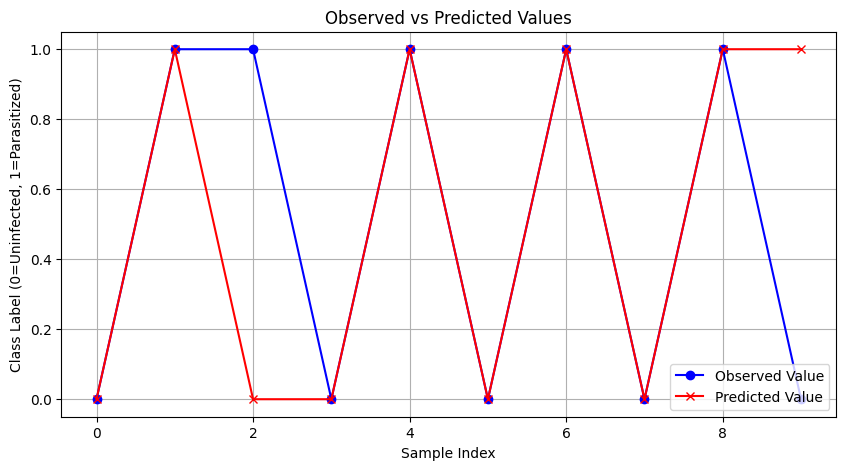

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have y_true (actual labels) and y_pred (predicted labels)
# If not, you can extract them like this:
# y_true = test_generator.classes
# y_pred_prob = model.predict(test_generator)
# y_pred = np.argmax(y_pred_prob, axis=1)  # for multi-class
# for binary classification:
# y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# Example using dummy predictions (replace these with your actual data)
y_true = np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0])
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

# Plotting line plot
plt.figure(figsize=(10, 5))
plt.plot(y_true, label='Observed Value', marker='o', color='blue')
plt.plot(y_pred, label='Predicted Value', marker='x', color='red')
plt.title('Observed vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Class Label (0=Uninfected, 1=Parasitized)')
plt.legend()
plt.grid(True)
plt.show()
